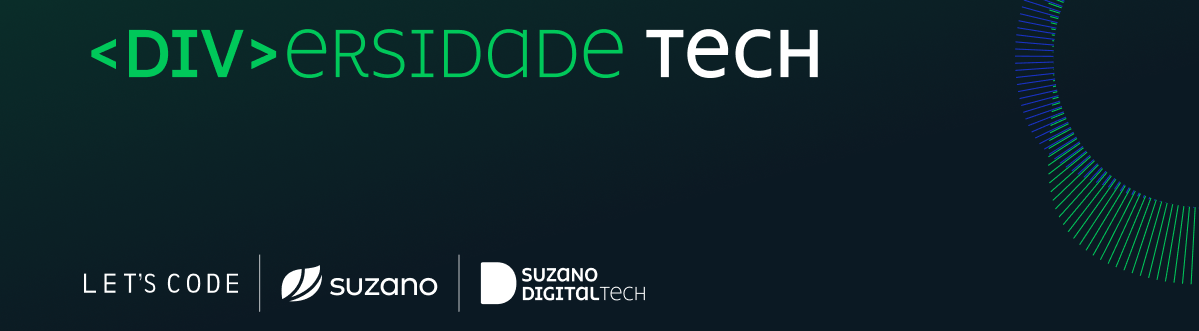

# Análise Exploratória de Dados
### covid_19_data.csv


#### Descrição do cenário



        Segundo a Organização Pan-Americana da Saúde, em março de dezembro de 2019 as autoridades chinesas reportaram à Organização Mundial da Saúde sobre o surgimento de um novo vírus que estava provocando inúmeros casos de pnaumonia e de rápida transmissão. Tratava-se de uma nova variante do SARS-COV: SARS-CoV2, que ficou mais conhecido pela doença que provoca, o COVID-19 (OPAS, 2019). 
       

        Dessa forma, os dados presentes no dataset covid_19_data.csv que foram extraídas da plataforma Kaggle, contêm informações acerca da progressão do vírus SARS-CoV2 no mundo. São amostras diárias da evolução da pandemia feitas em um recorte de um ano e quatro meses (22/01/2020 a 29/05/2021). Isso pode ser visto no gráfico abaixo obtido a partir desse dataset.


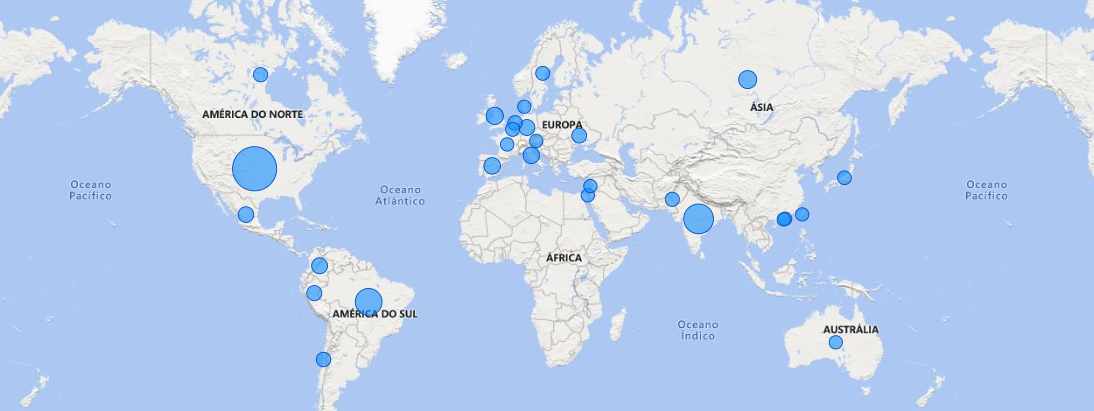
fonte: covid_19_data.csv powered by PowerBi

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('.\covid_19_data.csv') 

>### Conhecendo o dataset

     Verificando o cabeçalho e rodapé. Aqui verifica-se que a observação tem duração de 1 ano e 4 meses (22/01/2020 a 29/05/2021)


In [3]:
dataset.head() 

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
dataset.tail() 

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


    Resumo estatístico .describe()
    É possível identificar algumas inconsistências como a presença de valores negativos na estatística "min"
    para as variáveis "Deaths" e "Recovered"

In [5]:
dataset.describe() 

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


    observando as variáveis do dataset .colums()
    A variável "SNo" pode ser excluída dessa análise pois a indexação dos registros também é feita automaticamente 
    pelo pandas

In [6]:
dataset.columns 

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

    observando a quantidade de registros e variáveis .shape()

In [7]:
dataset.shape 

(306429, 8)

    Analisando a estrutura do dataset .info

In [8]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


    verificando a quantidade (.sum()) de registros nulos .isna()

In [9]:
dataset.isna().sum() 

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

    proporção de registros nulos da variável 'Province/State'

In [10]:
province_razao_nulos = (dataset.isna().sum()/len(dataset['ObservationDate'])) * 100 

In [11]:
print(province_razao_nulos)

SNo                 0.000000
ObservationDate     0.000000
Province/State     25.487144
Country/Region      0.000000
Last Update         0.000000
Confirmed           0.000000
Deaths              0.000000
Recovered           0.000000
dtype: float64


In [56]:
len(dataset['ObservationDate'])

306425

##### Tratamento de dados

    preenchendo valores na com "Unknow" .fillna() e observando as mudanças

In [12]:
dataset['Province/State'] = dataset['Province/State'].fillna('Unknow') 

In [13]:
dataset.isna().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

     Excluindo a variável "SNo" .drop()

In [14]:
dataset = dataset.drop('SNo', axis = 1)

    As colunas Confirmed, Deaths e Recovered têm valores mínimos negativos, o que não faz sentido

In [15]:
dataset['Confirmed'][dataset['Confirmed'] < 0] #verificando registros com valor negativo

147524   -302844.0
Name: Confirmed, dtype: float64

In [16]:
dataset[147524:147525] #visualizando o registro

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
147524,11/02/2020,Unknown,Colombia,2021-04-02 15:13:53,-302844.0,0.0,0.0


    Observando as datas do dia anterior e posterior antes de confirmar a exclusão

In [17]:
dataset[:][(dataset['Country/Region'] == 'Colombia') & (dataset['ObservationDate'] == '11/01/2020')]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
146272,11/01/2020,Amazonas,Colombia,2021-04-02 15:13:53,2911.0,117.0,2776.0
146281,11/01/2020,Antioquia,Colombia,2021-04-02 15:13:53,170819.0,3253.0,156116.0
146286,11/01/2020,Arauca,Colombia,2021-04-02 15:13:53,3383.0,97.0,2988.0
146299,11/01/2020,Atlantico,Colombia,2021-04-02 15:13:53,72102.0,3135.0,67478.0
146320,11/01/2020,Bolivar,Colombia,2021-04-02 15:13:53,33178.0,846.0,31487.0
146322,11/01/2020,Boyaca,Colombia,2021-04-02 15:13:53,14709.0,305.0,12216.0
146332,11/01/2020,Caldas,Colombia,2021-04-02 15:13:53,14383.0,287.0,11285.0
146339,11/01/2020,Capital District,Colombia,2021-04-02 15:13:53,322980.0,7670.0,292242.0
146340,11/01/2020,Caqueta,Colombia,2021-04-02 15:13:53,11445.0,398.0,10136.0
146341,11/01/2020,Casanare,Colombia,2021-04-02 15:13:53,5125.0,95.0,4348.0


In [18]:
dataset[:][(dataset['Country/Region'] == 'Colombia') & (dataset['ObservationDate'] == '11/03/2020')]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
147770,11/03/2020,Amazonas,Colombia,2021-04-02 15:13:53,2939.0,118.0,2785.0
147779,11/03/2020,Antioquia,Colombia,2021-04-02 15:13:53,174345.0,3298.0,160459.0
147784,11/03/2020,Arauca,Colombia,2021-04-02 15:13:53,3415.0,98.0,3031.0
147797,11/03/2020,Atlantico,Colombia,2021-04-02 15:13:53,72480.0,3137.0,67815.0
147818,11/03/2020,Bolivar,Colombia,2021-04-02 15:13:53,33476.0,851.0,31864.0
147820,11/03/2020,Boyaca,Colombia,2021-04-02 15:13:53,15214.0,316.0,12613.0
147830,11/03/2020,Caldas,Colombia,2021-04-02 15:13:53,15084.0,296.0,12010.0
147837,11/03/2020,Capital District,Colombia,2021-04-02 15:13:53,325839.0,7715.0,294790.0
147838,11/03/2020,Caqueta,Colombia,2021-04-02 15:13:53,11638.0,404.0,10302.0
147839,11/03/2020,Casanare,Colombia,2021-04-02 15:13:53,5324.0,101.0,4466.0


In [19]:
 dataset[:][(dataset['Country/Region'] == 'Colombia') & (dataset['ObservationDate'] == '11/02/2020')]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
147021,11/02/2020,Amazonas,Colombia,2021-04-02 15:13:53,3403.0,117.0,2778.0
147030,11/02/2020,Antioquia,Colombia,2021-04-02 15:13:53,324385.0,3272.0,158080.0
147035,11/02/2020,Arauca,Colombia,2021-04-02 15:13:53,4206.0,97.0,3013.0
147048,11/02/2020,Atlantico,Colombia,2021-04-02 15:13:53,72288.0,3136.0,67629.0
147069,11/02/2020,Bolivar,Colombia,2021-04-02 15:13:53,33424.0,850.0,31598.0
147071,11/02/2020,Boyaca,Colombia,2021-04-02 15:13:53,15517.0,310.0,12419.0
147081,11/02/2020,Caldas,Colombia,2021-04-02 15:13:53,14976.0,295.0,11626.0
147088,11/02/2020,Capital District,Colombia,2021-04-02 15:13:53,324385.0,7688.0,294061.0
147089,11/02/2020,Caqueta,Colombia,2021-04-02 15:13:53,13491.0,398.0,10183.0
147090,11/02/2020,Casanare,Colombia,2021-04-02 15:13:53,5924.0,99.0,4385.0


In [20]:
dataset = dataset.drop(147524)

In [21]:
dataset.iloc[147524] 

ObservationDate             11/02/2020
Province/State                 Unknown
Country/Region                 Germany
Last Update        2021-04-02 15:13:53
Confirmed                       8738.0
Deaths                             0.0
Recovered                          0.0
Name: 147525, dtype: object

In [22]:
#dataset[:][(dataset['Country/Region'] == 'Colombia') & (dataset['ObservationDate'] == '11/01/2020')]

In [23]:
#dataset[147524:147525]

In [24]:
dataset['Deaths'][dataset['Deaths'] < 0] #aqui têm-se dois registros negativos

118363   -178.0
141534   -154.0
Name: Deaths, dtype: float64

In [25]:
dataset[118363:118364]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
118363,09/24/2020,Unknown,Colombia,2021-04-02 15:13:53,0.0,-178.0,-12684.0


In [26]:
dataset[141534:141535]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
141534,10/25/2020,Unknown,Colombia,2021-04-02 15:13:53,0.0,-154.0,-8072.0


    Como visto acima, a variável 'confirmed' nos dois registros está zerada. Não é possível afirmar que as mortes e os casos recuperados foram induzidos pela infecção do vírus covid-19. Dessa forma, esses registros serão eliminados

In [27]:
dataset = dataset.drop(118363)
dataset = dataset.drop(141534)

In [28]:
dataset[118363:118364]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
118364,09/24/2020,Unknown,Germany,2021-04-02 15:13:53,2410.0,0.0,0.0


In [29]:
dataset[141534:141535]

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
141536,10/25/2020,Unknown,India,2021-04-02 15:13:53,0.0,0.0,0.0


In [30]:
dataset.describe() #verificando se ainda existem registros negativos

,Confirmed,Deaths,Recovered
count,3.064260e+05,306426.000000,3.064260e+05
mean,8.567274e+04,2036.424288,5.042085e+04
std,2.775520e+05,6410.965905,2.015134e+05
min,0.000000e+00,0.000000,-8.544050e+05
25%,1.042000e+03,13.000000,1.100000e+01
50%,1.037550e+04,192.000000,1.751000e+03
75%,5.075200e+04,1322.000000,2.027000e+04
max,5.863138e+06,112385.000000,6.399531e+06


In [31]:
dataset['Recovered'][dataset['Recovered'] < 0]

145277   -854405.0
Name: Recovered, dtype: float64

In [32]:
index = dataset['Recovered'][dataset['Recovered'] < 0].index

In [33]:
dataset = dataset.drop(index)

In [34]:
dataset.describe()

,Confirmed,Deaths,Recovered
count,3.064250e+05,306425.000000,3.064250e+05
mean,8.567302e+04,2036.429286,5.042380e+04
std,2.775524e+05,6410.975769,2.015071e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,1.042000e+03,13.000000,1.100000e+01
50%,1.037600e+04,192.000000,1.751000e+03
75%,5.075200e+04,1322.000000,2.027000e+04
max,5.863138e+06,112385.000000,6.399531e+06


## Estatísticas

>###### Variáveis de interesse: Confirmed, Deaths, Recovered

In [35]:
dataset['Confirmed'].value_counts() #podemos analisar possíveis casos de subnotificações

0.0         4738
1.0         2439
13.0        1237
18.0        1047
3.0          934
            ... 
431137.0       1
146252.0       1
798098.0       1
152235.0       1
391559.0       1
Name: Confirmed, Length: 107145, dtype: int64

>>###### Possíveis casos de subnotificações: Confirmed == 0

In [36]:
dataset[:][dataset['Confirmed'] == 0] # Possíveis casos de subnotificação

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
10,01/22/2020,Heilongjiang,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
12,01/22/2020,Hong Kong,Hong Kong,1/22/2020 17:00,0.0,0.0,0.0
15,01/22/2020,Inner Mongolia,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
18,01/22/2020,Jilin,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
306368,05/29/2021,Unknown,Mainland China,2021-05-30 04:20:55,0.0,0.0,10.0
306369,05/29/2021,Unknown,Mexico,2021-05-30 04:20:55,0.0,0.0,1924865.0
306371,05/29/2021,Unknown,Peru,2021-05-30 04:20:55,0.0,0.0,1897522.0
306372,05/29/2021,Unknown,Spain,2021-05-30 04:20:55,0.0,0.0,0.0


In [37]:
slice_1 = dataset[:][(dataset['Confirmed'] == 0) & (dataset['Deaths'] == 0) & (dataset['Recovered'] == 0)]

In [38]:
slice_1

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
10,01/22/2020,Heilongjiang,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
12,01/22/2020,Hong Kong,Hong Kong,1/22/2020 17:00,0.0,0.0,0.0
15,01/22/2020,Inner Mongolia,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
18,01/22/2020,Jilin,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
306261,05/29/2021,Recovered,US,2021-05-30 04:20:55,0.0,0.0,0.0
306364,05/29/2021,Unknown,Colombia,2021-05-30 04:20:55,0.0,0.0,0.0
306366,05/29/2021,Unknown,India,2021-05-30 04:20:55,0.0,0.0,0.0
306372,05/29/2021,Unknown,Spain,2021-05-30 04:20:55,0.0,0.0,0.0


In [39]:
slice_1.shape

(3326, 7)

In [40]:
slice_1[:][slice_1['Province/State'] == 'Unknown']

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
38,01/22/2020,Unknown,China,1/22/2020 17:00,0.0,0.0,0.0
86,01/23/2020,Unknown,China,1/23/20 17:00,0.0,0.0,0.0
129,01/24/2020,Unknown,China,1/24/20 17:00,0.0,0.0,0.0
175,01/25/2020,Unknown,China,1/25/20 17:00,0.0,0.0,0.0
224,01/26/2020,Unknown,China,1/26/20 16:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
305608,05/28/2021,Unknown,UK,2021-05-29 04:20:41,0.0,0.0,0.0
306364,05/29/2021,Unknown,Colombia,2021-05-30 04:20:55,0.0,0.0,0.0
306366,05/29/2021,Unknown,India,2021-05-30 04:20:55,0.0,0.0,0.0
306372,05/29/2021,Unknown,Spain,2021-05-30 04:20:55,0.0,0.0,0.0


In [41]:
slice_1[:][slice_1['Province/State'] == 'Unknown'].describe()

,Confirmed,Deaths,Recovered
count,1655.0,1655.0,1655.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


In [42]:
slice_1.count()

ObservationDate    3326
Province/State     3326
Country/Region     3326
Last Update        3326
Confirmed          3326
Deaths             3326
Recovered          3326
dtype: int64

dataset[:][(dataset['Confirmed'] == 0) & (dataset['Deaths'] > 0) & (dataset['Recovered'] > 0)]

In [43]:
data2 = dataset.groupby(['Country/Region'], axis = 0).sum('Deaths').sort_values('Deaths', ascending=False)

In [44]:
dataset.pivot_table(index='Country/Region', values=['Confirmed','Recovered', 'Deaths'], aggfunc='max').sort_values('Deaths', ascending=False)

,Confirmed,Deaths,Recovered
Country/Region,,,
UK,3910803.0,112385.0,4192.0
Brazil,3254893.0,111123.0,2895697.0
France,5863138.0,108532.0,331686.0
India,5713215.0,94030.0,5339838.0
Iran,2893218.0,79741.0,2425033.0
...,...,...,...
Marshall Islands,4.0,0.0,4.0
Macau,51.0,0.0,49.0
"('St. Martin',)",2.0,0.0,0.0


In [45]:
dataset.pivot_table(index=['Country/Region', 'ObservationDate'], values=['Confirmed','Recovered', 'Deaths'], aggfunc='max').sort_values('Deaths', ascending=False)

Confirmed    Deaths  Recovered
Country/Region                 ObservationDate                                
UK                             05/29/2021       3910803.0  112385.0     4192.0
                               05/28/2021       3908214.0  112379.0     4192.0
                               05/27/2021       3904934.0  112371.0     4192.0
                               05/26/2021       3902160.0  112363.0     4192.0
                               05/25/2021       3899813.0  112355.0     4192.0
...                                                   ...       ...        ...
Mozambique                     04/14/2020            28.0       0.0        2.0
                               04/13/2020            21.0       0.0        2.0
                               04/12/2020            21.0       0.0        2.0
                               04/11/2020            20.0       0.0        2.0
occupied Palestinian territory 03/17/2020             0.0       0.0        0.0

[87281 rows x 3 columns]

In [46]:
dataset.pivot_table(index='ObservationDate', values=['Confirmed','Recovered', 'Deaths'], aggfunc='max').sort_values('Deaths', ascending=False)

,Confirmed,Deaths,Recovered
ObservationDate,,,
05/29/2021,5713215.0,112385.0,5339838.0
05/28/2021,5692920.0,112379.0,5307874.0
05/27/2021,5672180.0,112371.0,5276203.0
05/26/2021,5650907.0,112363.0,5241833.0
05/25/2021,5626155.0,112355.0,5218768.0
...,...,...,...
01/26/2020,1058.0,52.0,42.0
01/25/2020,761.0,40.0,32.0
01/24/2020,549.0,24.0,31.0


In [47]:
dataset_boxplot = dataset.pivot_table(index='Country/Region', values=['Confirmed','Recovered', 'Deaths'], aggfunc='max').sort_values('Deaths', ascending=False)

<AxesSubplot:>

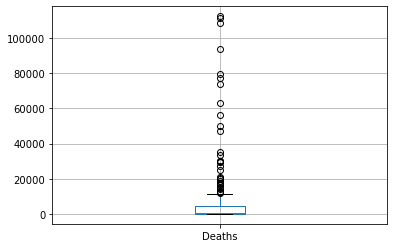

In [48]:
dataset_boxplot.boxplot('Deaths')

In [49]:
dataset_boxplot[:10]

,Confirmed,Deaths,Recovered
Country/Region,,,
UK,3910803.0,112385.0,4192.0
Brazil,3254893.0,111123.0,2895697.0
France,5863138.0,108532.0,331686.0
India,5713215.0,94030.0,5339838.0
Iran,2893218.0,79741.0,2425033.0
Argentina,3732263.0,77108.0,3288467.0
Poland,2871371.0,73682.0,2636675.0
US,3788713.0,63236.0,6399531.0
South Africa,1659070.0,56363.0,1554184.0


<AxesSubplot:>

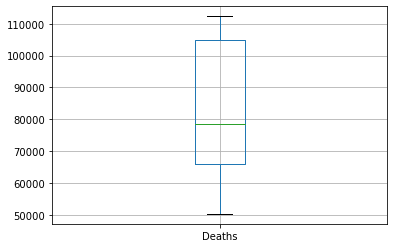

In [50]:
dataset_boxplot[:10].boxplot('Deaths')

    Algumas estatísticas do Brasil

In [51]:
dataset[:][dataset['Country/Region'] == 'Brazil'].mean()

C:\Users\lucas\AppData\Local\Temp/ipykernel_22204/1105221185.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset[:][dataset['Country/Region'] == 'Brazil'].mean()


Confirmed    259418.079969
Deaths         7099.873888
Recovered    226187.997654
dtype: float64

In [52]:
dataset[:][dataset['Country/Region'] == 'Brazil'].std()

C:\Users\lucas\AppData\Local\Temp/ipykernel_22204/1391014661.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset[:][dataset['Country/Region'] == 'Brazil'].std()


Confirmed    354845.684234
Deaths        11233.609415
Recovered    315573.919351
dtype: float64

In [53]:
dataset[:][dataset['Country/Region'] == 'Brazil'].median()

C:\Users\lucas\AppData\Local\Temp/ipykernel_22204/4230218450.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset[:][dataset['Country/Region'] == 'Brazil'].median()


Confirmed    155010.0
Deaths         3710.0
Recovered    134513.0
dtype: float64

<AxesSubplot:>

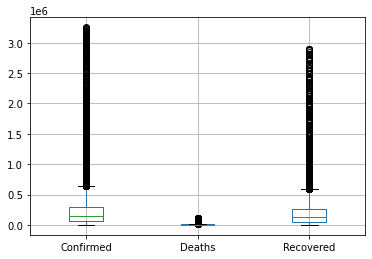

In [54]:
dataset[:][dataset['Country/Region'] == 'Brazil'].boxplot()